In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math

# default='warn'
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# import data
df = pd.read_csv('data.csv',delimiter=',')
df.head()

,invoice#,date,country,product_id,shop,gender,size_us,size_europe,size_uk,unit_price,discount,year,month,sale_price
0,52389,01-01-2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159.0,0%,2014,1,159.0
1,52390,01-01-2014,United States,2230,US15,Male,11.5,44-45,11.0,199.0,20%,2014,1,159.2
2,52391,01-01-2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149.0,20%,2014,1,119.2
3,52392,01-01-2014,United States,2234,US6,Female,9.5,40,7.5,159.0,0%,2014,1,159.0
4,52393,01-01-2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159.0,0%,2014,1,159.0


In [3]:
# check duplicated values
df.duplicated().all()

False

In [4]:
# check null values 
df.isna().all()

invoice#       False
date           False
country        False
product_id     False
shop           False
gender         False
size_us        False
size_europe    False
size_uk        False
unit_price     False
discount       False
year           False
month          False
sale_price     False
dtype: bool

In [5]:
# check datatype
df.dtypes

invoice#         int64
date            object
country         object
product_id       int64
shop            object
gender          object
size_us        float64
size_europe     object
size_uk        float64
unit_price     float64
discount        object
year             int64
month            int64
sale_price     float64
dtype: object

In [6]:
# country names
df.country.unique()

array(['United Kingdom', 'United States', 'Canada', 'Germany'],
      dtype=object)

In [7]:
# year
df.year.unique()

array([2014, 2015, 2016], dtype=int64)

In [8]:
# create sale data for each country and year 

def procreation(data,cntry,yr):
    aa = data.size_us.unique().tolist()
    aa.sort()
    dat = {'size_us':aa}
    df_new = pd.DataFrame(dat)
    d_n = pd.DataFrame(columns=range(1,13))
    df_new = df_new.append(d_n, ignore_index = True) 
    for mon in range(1,13):
        dd = data[(data['year']==yr) & (data['country']==cntry) & 
                       (data['month']==mon)]['size_us'].value_counts().tolist()
        dd1 = data[(data['year']==yr) & (data['country']==cntry) 
                   & (data['month']==mon)]['size_us'].value_counts().keys().tolist()
        dd11 = pd.DataFrame({'size':dd1,'count':dd})
        for ind , si in enumerate(df_new.size_us):
            for i,j in enumerate(dd11['size']):
                if si == j:
                    df_new[mon][ind] = dd11['count'][i]
    df_new.fillna(0,inplace=True)
    df_new.columns = ['size_us']+[str(x)+'_'+ str(yr) for x in ['jan','feb','mar','apr','may','jun',
                                                                'jul','aug','sep','oct','nov','dec']]
    return df_new


def procreation_shop(data,cntry,yr,shop):
    aa = data.size_us.unique().tolist()
    aa.sort()
    dat = {'size_us':aa}
    df_new = pd.DataFrame(dat)
    d_n = pd.DataFrame(columns=range(1,13))
    df_new = df_new.append(d_n, ignore_index = True) 
    for mon in range(1,13):
        dd = data[(data['year']==yr) & (data['country']==cntry) & 
                       (data['month']==mon) & (data['shop']==shop)]['size_us'].value_counts().tolist()
        dd1 = data[(data['year']==yr) & (data['country']==cntry) 
                   & (data['month']==mon) & (data['shop']==shop)]['size_us'].value_counts().keys().tolist()
        dd11 = pd.DataFrame({'size':dd1,'count':dd})
        for ind , si in enumerate(df_new.size_us):
            for i,j in enumerate(dd11['size']):
                if si == j:
                    df_new[mon][ind] = dd11['count'][i]
    df_new.fillna(0,inplace=True)
    df_new.columns = ['size_us']+[str(x)+'_'+ str(yr) for x in ['jan','feb','mar','apr','may','jun',
                                                                'jul','aug','sep','oct','nov','dec']]
    return df_new


def sum_all_country(data,cntry):
    count = 0
    for i in [2014,1015,2016]:
        if count == 0:
            df = procreation(data,cntry,i)
            df_OK = df.copy()
            count += 1
        else:
            df = procreation(data,cntry,i)
            df_OK = pd.merge(df_OK,df,on='size_us')
            
    return df_OK

def sum_all_shop(data,cntry,shop):
    count = 0
    for i in [2014,1015,2016]:
        if count == 0:
            df = procreation_shop(data,cntry,i,shop)
            df_OK = df.copy()
            count += 1
        else:
            df = procreation_shop(data,cntry,i,shop)
            df_OK = pd.merge(df_OK,df,on='size_us')
            
    return df_OK

#### We'll now generate the US sales data for the following years : 2014 , 2015 , 2016

In [9]:
# US sale data
df_US = sum_all_country(df,'United States')

In [10]:
df_US

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016
0,4.5,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,1,1,0,0,0
1,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
2,5.5,0,1,0,2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,3,4,0,1,0,3,6
3,6.0,1,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,6,10,5,3,3,4,4,9,3,1
4,6.5,0,0,0,2,0,1,3,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,13,8,8,1,2,9,13,9,2,3,3,1
5,7.0,0,1,3,4,4,1,2,4,2,4,8,12,0,0,0,0,0,0,0,0,0,0,0,0,6,3,4,5,11,16,9,8,8,8,4,4
6,7.5,16,2,4,0,3,4,3,2,4,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,16,10,25,19,19,20,13,22,24,10,5
7,8.0,24,15,12,15,6,10,7,16,9,12,5,4,0,0,0,0,0,0,0,0,0,0,0,0,26,43,24,23,46,21,40,42,36,38,25,20
8,8.5,4,4,6,15,19,5,4,8,8,11,4,7,0,0,0,0,0,0,0,0,0,0,0,0,19,17,20,20,42,34,52,34,33,31,22,21
9,9.0,8,12,15,12,17,9,12,2,17,12,8,17,0,0,0,0,0,0,0,0,0,0,0,0,37,24,23,19,36,39,47,46,55,49,27,30


#### We'll now generate the UK sales data for the following years : 2014 , 2015 , 2016

In [11]:
# UK sale data
df_UK = sum_all_country(df,'United Kingdom')

In [12]:
df_UK

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016
0,4.5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,2,1,0,0,0
1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,5,0,0,0
2,5.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2
3,6.0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0
4,6.5,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,2,1,1,0,0
5,7.0,1,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,7,3,4,4,1,2,2,2,2
6,7.5,3,2,2,1,4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,6,6,6,2,1,3,0,11,1,6,5
7,8.0,2,2,5,1,0,6,4,4,8,5,2,7,0,0,0,0,0,0,0,0,0,0,0,0,5,4,13,11,13,10,11,10,9,10,10,8
8,8.5,3,6,1,6,8,0,5,0,3,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,9,6,16,6,5,3,16,17,7,10,12,6
9,9.0,4,3,8,5,8,3,4,11,6,5,4,3,0,0,0,0,0,0,0,0,0,0,0,0,17,1,13,23,16,27,15,13,19,7,7,3


#### We'll now generate the Canada sales data for the following years : 2014 , 2015 , 2016

In [13]:
# Canada sale data
df_CANADA = sum_all_country(df,'Canada')

In [14]:
df_CANADA

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016
0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0
2,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,6.0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2,1,0,2,2,1,2,1
4,6.5,0,0,0,5,0,2,1,3,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,2,5,4,5,1,2,0,3
5,7.0,1,1,0,0,0,0,0,0,0,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,4,6,4,2,2,4,1,5,15,8,8,4
6,7.5,2,1,0,1,2,1,1,1,2,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,21,13,7,13,14,7,5,8,9,11,5,9
7,8.0,8,6,13,10,10,9,11,9,4,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,8,9,5,5,11,9,8,6,9,6
8,8.5,3,2,2,8,14,15,12,14,12,14,11,2,0,0,0,0,0,0,0,0,0,0,0,0,9,14,12,12,8,10,4,19,17,13,7,13
9,9.0,10,9,5,15,6,8,8,7,5,9,2,12,0,0,0,0,0,0,0,0,0,0,0,0,19,27,18,28,25,27,26,22,19,18,8,14


#### We'll now generate the Germany sales data for the following years : 2014 , 2015 , 2016

In [15]:
# Germany sale data
df_GERMANY = sum_all_country(df,'Germany')

In [16]:
df_GERMANY

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016
0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,0
1,5.0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0
2,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1
3,6.0,1,1,1,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,1,2,1,0,2,0,6,1,1
4,6.5,0,0,0,0,2,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,3,3,2,4,4,1,7,2,8,4
5,7.0,4,7,9,10,11,8,7,10,11,10,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,8,3,6,3,4,7,4,2,7
6,7.5,3,2,1,1,0,0,2,0,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,5,5,5,10,22,17,14,27,26,9,8
7,8.0,2,0,3,0,4,2,7,7,3,8,7,12,0,0,0,0,0,0,0,0,0,0,0,0,28,19,12,30,10,11,20,20,16,28,16,18
8,8.5,5,5,6,3,3,5,1,2,2,7,5,4,0,0,0,0,0,0,0,0,0,0,0,0,27,25,29,22,27,19,38,22,20,25,24,19
9,9.0,6,8,10,7,18,15,6,12,15,8,8,14,0,0,0,0,0,0,0,0,0,0,0,0,23,8,20,31,23,27,33,27,38,16,18,20


### Get Sale Data for indiviual shops

### United States

In [17]:
df[df['country'] == 'United States'].shop.unique().tolist()

['US15',
 'US6',
 'US13',
 'US1',
 'US11',
 'US2',
 'US7',
 'US5',
 'US12',
 'US9',
 'US4',
 'US14',
 'US3',
 'US8',
 'US10']

In [18]:
US1_hist = sum_all_shop(df,'United States','US1')

In [19]:
US2_hist = sum_all_shop(df,'United States','US2')

In [20]:
US3_hist = sum_all_shop(df,'United States','US3')

In [21]:
US4_hist = sum_all_shop(df,'United States','US4')

In [22]:
US5_hist = sum_all_shop(df,'United States','US5')

In [23]:
US6_hist = sum_all_shop(df,'United States','US6')

In [24]:
US7_hist = sum_all_shop(df,'United States','US7')

In [25]:
US8_hist = sum_all_shop(df,'United States','US8')

In [26]:
US9_hist = sum_all_shop(df,'United States','US9')

In [27]:
US10_hist = sum_all_shop(df,'United States','US10')

In [28]:
US11_hist = sum_all_shop(df,'United States','US11')

In [29]:
US12_hist = sum_all_shop(df,'United States','US12')

In [30]:
US13_hist = sum_all_shop(df,'United States','US13')

In [31]:
US14_hist = sum_all_shop(df,'United States','US14')

In [32]:
US15_hist = sum_all_shop(df,'United States','US15')

### United Kingdom

In [33]:
df[df['country'] == 'United Kingdom'].shop.unique().tolist()

['UK2', 'UK4', 'UK1', 'UK5', 'UK3']

In [34]:
UK1_hist = sum_all_shop(df,'United Kingdom','UK1')

In [35]:
UK2_hist = sum_all_shop(df,'United Kingdom','UK2')

In [36]:
UK3_hist = sum_all_shop(df,'United Kingdom','UK3')

In [37]:
UK4_hist = sum_all_shop(df,'United Kingdom','UK4')

In [38]:
UK5_hist = sum_all_shop(df,'United Kingdom','UK5')

### Canada

In [39]:
df[df['country'] == 'Canada'].shop.unique().tolist()

['CAN7', 'CAN5', 'CAN6', 'CAN3', 'CAN2', 'CAN1']

In [40]:
CAN1_hist = sum_all_shop(df,'Canada','CAN1')

In [41]:
CAN2_hist = sum_all_shop(df,'Canada','CAN2')

In [42]:
CAN3_hist = sum_all_shop(df,'Canada','CAN3')

In [43]:
CAN4_hist = sum_all_shop(df,'Canada','CAN4')

In [44]:
CAN5_hist = sum_all_shop(df,'Canada','CAN5')

In [45]:
CAN6_hist = sum_all_shop(df,'Canada','CAN6')

In [46]:
CAN7_hist = sum_all_shop(df,'Canada','CAN7')

### Germany

In [47]:
df[df['country'] == 'Germany'].shop.unique().tolist()

['GER2', 'GER1', 'GER3']

In [48]:
GER1_hist = sum_all_shop(df,'Germany','GER1')

In [49]:
GER2_hist = sum_all_shop(df,'Germany','GER2')

In [50]:
GER3_hist = sum_all_shop(df,'Germany','GER3')

### Statistical Analysis 

In [51]:
# Function to calculate mean : overall , year : 2014,2015,2016 , standard_error , margin of error , 95% confidence interval
# and finally the total number of shoes should be stacked for each.

def calculate(data):
    '''
    
    We will perform T statistics here, because :
        Small sample data.
        We have sample data, unknown variance.
        We assume the distribution is normal.
        
        n = no of samples (36 - overall , 12 - each year)
        degree of freedom = n -1 = 35 - overall, 11 - each year
        95% confidence interval 
        alpha = 0.05
        alpha/2 = 0.025
        
        t(11),(0.025) = 2.201 [T-Score]
        t(35),(0.025) = 2.03 [T-Score-Overall]
        
    '''
    t_value = 2.201
    t_value_overall = 2.03
    data['mean_2014'] = data.iloc[:, np.r_[:,1:13]].mean(axis=1)
    data['mean_2015'] = data.iloc[:, np.r_[:,13:25]].mean(axis=1)
    data['mean_2016'] = data.iloc[:, np.r_[:,25:37]].mean(axis=1)
    data['mean_overall'] = data.iloc[:, np.r_[:,1:37]].mean(axis=1)
    data['std_error_2014'] = data.iloc[:, np.r_[:,1:13]].std(axis=1)/math.sqrt(12)
    data['std_error_2015'] = data.iloc[:, np.r_[:,13:25]].std(axis=1)/math.sqrt(12)
    data['std_error_2016'] = data.iloc[:, np.r_[:,25:37]].std(axis=1)/math.sqrt(12)
    data['std_error_overall'] = data.iloc[:, np.r_[:,1:37]].std(axis=1)/math.sqrt(36)
    data['margin_of_error_2014'] = data['std_error_2014'] * t_value
    data['margin_of_error_2015'] = data['std_error_2015'] * t_value
    data['margin_of_error_2016'] = data['std_error_2016'] * t_value
    data['margin_of_error_overall'] = data['std_error_overall'] * t_value_overall
    data['ci_low_2014'] = data['mean_2014'] - data['margin_of_error_2014']
    data['ci_high_2014'] = data['mean_2014'] + data['margin_of_error_2014']
    data['ci_low_2015'] = data['mean_2015'] - data['margin_of_error_2015']
    data['ci_high_2015'] = data['mean_2015'] + data['margin_of_error_2015']
    data['ci_low_2016'] = data['mean_2016'] - data['margin_of_error_2016']
    data['ci_high_2016'] = data['mean_2016'] + data['margin_of_error_2016']
    data['ci_low_overall'] = data['mean_overall'] - data['margin_of_error_overall']
    data['ci_high_overall'] = data['mean_overall'] + data['margin_of_error_overall']
    data['#_pairs_2014'] = np.ceil(data['ci_high_2014'])
    data['#_pairs_2015'] = np.ceil(data['ci_high_2015'])
    data['#_pairs_2016'] = np.ceil(data['ci_high_2016'])
    data['#_pairs_overall'] = np.ceil(data['ci_high_overall'])
    data['#_pairs_overall_minus2014'] = np.ceil(data['ci_high_2014'])
    data['#_pairs_overall_minus2015'] = np.ceil(data['ci_high_2015'])
    data['#_pairs_overall_minus2016'] = np.ceil(data['ci_high_2016'])
    
    return data

In [52]:
# US
calculate(df_US)

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016,mean_2014,mean_2015,mean_2016,mean_overall,std_error_2014,std_error_2015,std_error_2016,std_error_overall,margin_of_error_2014,margin_of_error_2015,margin_of_error_2016,margin_of_error_overall,ci_low_2014,ci_high_2014,ci_low_2015,ci_high_2015,ci_low_2016,ci_high_2016,ci_low_overall,ci_high_overall,#_pairs_2014,#_pairs_2015,#_pairs_2016,#_pairs_overall,#_pairs_overall_minus2014,#_pairs_overall_minus2015,#_pairs_overall_minus2016
0,4.5,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,1,1,0,0,0,0.416667,0.0,0.666667,0.361111,0.287580,0.0,0.284268,0.138889,0.632963,0.0,0.625673,0.281944,-0.216296,1.049629,0.0,0.0,0.040994,1.292340,0.079167,0.643056,2.0,0.0,2.0,1.0,2.0,0.0,2.0
1,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0.083333,0.0,0.333333,0.138889,0.083333,0.0,0.142134,0.058456,0.183417,0.0,0.312837,0.118666,-0.100083,0.266750,0.0,0.0,0.020497,0.646170,0.020223,0.257555,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,5.5,0,1,0,2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,3,4,0,1,0,3,6,0.500000,0.0,1.916667,0.805556,0.230283,0.0,0.633154,0.257643,0.506853,0.0,1.393572,0.523016,-0.006853,1.006853,0.0,0.0,0.523095,3.310238,0.282540,1.328571,2.0,0.0,4.0,2.0,2.0,0.0,4.0
3,6.0,1,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,6,10,5,3,3,4,4,9,3,1,0.500000,0.0,4.666667,1.722222,0.230283,0.0,0.741960,0.433903,0.506853,0.0,1.633055,0.880823,-0.006853,1.006853,0.0,0.0,3.033612,6.299721,0.841400,2.603045,2.0,0.0,7.0,3.0,2.0,0.0,7.0
4,6.5,0,0,0,2,0,1,3,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,13,8,8,1,2,9,13,9,2,3,3,1,0.916667,0.0,6.000000,2.305556,0.357990,0.0,1.302678,0.624652,0.787935,0.0,2.867194,1.268043,0.128732,1.704602,0.0,0.0,3.132806,8.867194,1.037513,3.573598,2.0,0.0,9.0,4.0,2.0,0.0,9.0
5,7.0,0,1,3,4,4,1,2,4,2,4,8,12,0,0,0,0,0,0,0,0,0,0,0,0,6,3,4,5,11,16,9,8,8,8,4,4,3.750000,0.0,7.166667,3.638889,0.962360,0.0,1.071909,0.679814,2.118154,0.0,2.359273,1.380023,1.631846,5.868154,0.0,0.0,4.807394,9.525939,2.258866,5.018912,6.0,0.0,10.0,6.0,6.0,0.0,10.0
6,7.5,16,2,4,0,3,4,3,2,4,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,6,16,10,25,19,19,20,13,22,24,10,5,4.166667,0.0,15.750000,6.638889,1.236033,0.0,1.977621,1.355853,2.720509,0.0,4.352744,2.752382,1.446158,6.887175,0.0,0.0,11.397256,20.102744,3.886507,9.391271,7.0,0.0,21.0,10.0,7.0,0.0,21.0
7,8.0,24,15,12,15,6,10,7,16,9,12,5,4,0,0,0,0,0,0,0,0,0,0,0,0,26,43,24,23,46,21,40,42,36,38,25,20,11.250000,0.0,32.000000,14.416667,1.647427,0.0,2.790677,2.473791,3.625986,0.0,6.142280,5.021796,7.624014,14.875986,0.0,0.0,25.857720,38.142280,9.394871,19.438463,15.0,0.0,39.0,20.0,15.0,0.0,39.0
8,8.5,4,4,6,15,19,5,4,8,8,11,4,7,0,0,0,0,0,0,0,0,0,0,0,0,19,17,20,20,42,34,52,34,33,31,22,21,7.916667,0.0,28.750000,12.222222,1.395112,0.0,3.121589,2.329286,3.070642,0.0,6.870617,4.728451,4.846024,10.987309,0.0,0.0,21.879383,35.620617,7.493772,16.950673,11.0,0.0,36.0,17.0,11.0,0.0,36.0
9,9.0,8,12,15,12,17,9,12,2,17,12,8,17,0,0,0,0,0,0,0,0,0,0,0,0,37,24,23,19,36,39,47,46,55,49,27,30,11.750000,0.0,36.000000,15.916667,1.303405,0.0,3.348451,2.787835,2.868794,0.0,7.369940,5.659305,8.881206,14.618794,0.0,0.0,28.630060,43.369940,10.257362,21.575972,15.0,0.0,44.0,22.0,15.0,0.0,44.0


In [53]:
calculate(df_UK)

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016,mean_2014,mean_2015,mean_2016,mean_overall,std_error_2014,std_error_2015,std_error_2016,std_error_overall,margin_of_error_2014,margin_of_error_2015,margin_of_error_2016,margin_of_error_overall,ci_low_2014,ci_high_2014,ci_low_2015,ci_high_2015,ci_low_2016,ci_high_2016,ci_low_overall,ci_high_overall,#_pairs_2014,#_pairs_2015,#_pairs_2016,#_pairs_overall,#_pairs_overall_minus2014,#_pairs_overall_minus2015,#_pairs_overall_minus2016
0,4.5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,2,1,0,0,0,0.166667,0.0,0.666667,0.277778,0.166667,0.0,0.355335,0.135758,0.366833,0.0,0.782091,0.275589,-0.200167,0.533500,0.0,0.0,-0.115425,1.448758,0.002188,0.553367,1.0,0.0,2.0,1.0,1.0,0.0,2.0
1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,5,0,0,0,0.000000,0.0,0.666667,0.222222,0.000000,0.0,0.432283,0.149662,0.000000,0.0,0.951455,0.303813,0.000000,0.000000,0.0,0.0,-0.284788,1.618122,-0.081591,0.526035,0.0,0.0,2.0,1.0,0.0,0.0,2.0
2,5.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0.083333,0.0,0.333333,0.138889,0.083333,0.0,0.188025,0.070742,0.183417,0.0,0.413844,0.143606,-0.100083,0.266750,0.0,0.0,-0.080510,0.747177,-0.004717,0.282495,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,6.0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0.416667,0.0,0.416667,0.277778,0.228908,0.0,0.336162,0.135758,0.503827,0.0,0.739893,0.275589,-0.087160,0.920494,0.0,0.0,-0.323226,1.156560,0.002188,0.553367,1.0,0.0,2.0,1.0,1.0,0.0,2.0
4,6.5,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,2,1,1,0,0,0.416667,0.0,0.833333,0.416667,0.259905,0.0,0.344510,0.151054,0.572050,0.0,0.758266,0.306641,-0.155384,0.988717,0.0,0.0,0.075068,1.591599,0.110026,0.723307,1.0,0.0,2.0,1.0,1.0,0.0,2.0
5,7.0,1,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,7,3,4,4,1,2,2,2,2,0.500000,0.0,2.666667,1.055556,0.261116,0.0,0.512471,0.270051,0.574717,0.0,1.127948,0.548204,-0.074717,1.074717,0.0,0.0,1.538719,3.794615,0.507351,1.603760,2.0,0.0,4.0,2.0,2.0,0.0,4.0
6,7.5,3,2,2,1,4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,6,6,6,2,1,3,0,11,1,6,5,1.250000,0.0,4.333333,1.861111,0.371830,0.0,0.890466,0.438527,0.818398,0.0,1.959915,0.890210,0.431602,2.068398,0.0,0.0,2.373418,6.293248,0.970901,2.751321,3.0,0.0,7.0,3.0,3.0,0.0,7.0
7,8.0,2,2,5,1,0,6,4,4,8,5,2,7,0,0,0,0,0,0,0,0,0,0,0,0,5,4,13,11,13,10,11,10,9,10,10,8,3.833333,0.0,9.500000,4.444444,0.715979,0.0,0.792961,0.744764,1.575870,0.0,1.745308,1.511871,2.257463,5.409204,0.0,0.0,7.754692,11.245308,2.932573,5.956316,6.0,0.0,12.0,6.0,6.0,0.0,12.0
8,8.5,3,6,1,6,8,0,5,0,3,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,9,6,16,6,5,3,16,17,7,10,12,6,3.166667,0.0,9.416667,4.194444,0.851321,0.0,1.384209,0.844985,1.873758,0.0,3.046645,1.715319,1.292909,5.040424,0.0,0.0,6.370022,12.463311,2.479126,5.909763,6.0,0.0,13.0,6.0,6.0,0.0,13.0
9,9.0,4,3,8,5,8,3,4,11,6,5,4,3,0,0,0,0,0,0,0,0,0,0,0,0,17,1,13,23,16,27,15,13,19,7,7,3,5.333333,0.0,13.416667,6.250000,0.721250,0.0,2.261195,1.208025,1.587472,0.0,4.976891,2.452292,3.745861,6.920805,0.0,0.0,8.439775,18.393558,3.797708,8.702292,7.0,0.0,19.0,9.0,7.0,0.0,19.0


In [54]:
calculate(df_CANADA)

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016,mean_2014,mean_2015,mean_2016,mean_overall,std_error_2014,std_error_2015,std_error_2016,std_error_overall,margin_of_error_2014,margin_of_error_2015,margin_of_error_2016,margin_of_error_overall,ci_low_2014,ci_high_2014,ci_low_2015,ci_high_2015,ci_low_2016,ci_high_2016,ci_low_overall,ci_high_overall,#_pairs_2014,#_pairs_2015,#_pairs_2016,#_pairs_overall,#_pairs_overall_minus2014,#_pairs_overall_minus2015,#_pairs_overall_minus2016
0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0.000000,0.0,0.416667,0.138889,0.000000,0.0,0.416667,0.138889,0.000000,0.0,0.917083,0.281944,0.000000,0.000000,0.0,0.0,-0.500417,1.333750,-0.143056,0.420833,0.0,0.0,2.0,1.0,0.0,0.0,2.0
1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0.000000,0.0,0.333333,0.111111,0.000000,0.0,0.224733,0.077437,0.000000,0.0,0.494638,0.157197,0.000000,0.000000,0.0,0.0,-0.161305,0.827971,-0.046086,0.268308,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000000,0.0,0.166667,0.055556,0.000000,0.0,0.112367,0.038718,0.000000,0.0,0.247319,0.078598,0.000000,0.000000,0.0,0.0,-0.080652,0.413986,-0.023043,0.134154,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,6.0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2,1,0,2,2,1,2,1,0.250000,0.0,1.416667,0.555556,0.179435,0.0,0.336162,0.161562,0.394937,0.0,0.739893,0.327971,-0.144937,0.644937,0.0,0.0,0.676774,2.156560,0.227585,0.883526,1.0,0.0,3.0,1.0,1.0,0.0,3.0
4,6.5,0,0,0,5,0,2,1,3,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,2,5,4,5,1,2,0,3,1.333333,0.0,2.583333,1.305556,0.481999,0.0,0.608753,0.308142,1.060880,0.0,1.339866,0.625528,0.272453,2.394214,0.0,0.0,1.243467,3.923200,0.680027,1.931084,3.0,0.0,4.0,2.0,3.0,0.0,4.0
5,7.0,1,1,0,0,0,0,0,0,0,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,4,6,4,2,2,4,1,5,15,8,8,4,0.916667,0.0,5.250000,2.055556,0.451569,0.0,1.087985,0.543277,0.993902,0.0,2.394656,1.102852,-0.077236,1.910569,0.0,0.0,2.855344,7.644656,0.952703,3.158408,2.0,0.0,8.0,4.0,2.0,0.0,8.0
6,7.5,2,1,0,1,2,1,1,1,2,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,21,13,7,13,14,7,5,8,9,11,5,9,1.500000,0.0,10.166667,3.888889,0.337100,0.0,1.319052,0.876300,0.741957,0.0,2.903234,1.778888,0.758043,2.241957,0.0,0.0,7.263433,13.069901,2.110000,5.667777,3.0,0.0,14.0,6.0,3.0,0.0,14.0
7,8.0,8,6,13,10,10,9,11,9,4,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,8,9,5,5,11,9,8,6,9,6,7.500000,0.0,7.500000,5.000000,1.040833,0.0,0.543557,0.708228,2.290873,0.0,1.196370,1.437703,5.209127,9.790873,0.0,0.0,6.303630,8.696370,3.562297,6.437703,10.0,0.0,9.0,7.0,10.0,0.0,9.0
8,8.5,3,2,2,8,14,15,12,14,12,14,11,2,0,0,0,0,0,0,0,0,0,0,0,0,9,14,12,12,8,10,4,19,17,13,7,13,9.083333,0.0,11.500000,6.861111,1.549479,0.0,1.215431,1.051947,3.410402,0.0,2.675164,2.135452,5.672931,12.493736,0.0,0.0,8.824836,14.175164,4.725659,8.996563,13.0,0.0,15.0,9.0,13.0,0.0,15.0
9,9.0,10,9,5,15,6,8,8,7,5,9,2,12,0,0,0,0,0,0,0,0,0,0,0,0,19,27,18,28,25,27,26,22,19,18,8,14,8.000000,0.0,20.916667,9.638889,0.992395,0.0,1.755763,1.596202,2.184262,0.0,3.864433,3.240291,5.815738,10.184262,0.0,0.0,17.052233,24.781100,6.398598,12.879179,11.0,0.0,25.0,13.0,11.0,0.0,25.0


In [55]:
calculate(df_GERMANY)

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016,mean_2014,mean_2015,mean_2016,mean_overall,std_error_2014,std_error_2015,std_error_2016,std_error_overall,margin_of_error_2014,margin_of_error_2015,margin_of_error_2016,margin_of_error_overall,ci_low_2014,ci_high_2014,ci_low_2015,ci_high_2015,ci_low_2016,ci_high_2016,ci_low_overall,ci_high_overall,#_pairs_2014,#_pairs_2015,#_pairs_2016,#_pairs_overall,#_pairs_overall_minus2014,#_pairs_overall_minus2015,#_pairs_overall_minus2016
0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,0,0.000000,0.0,0.500000,0.166667,0.000000,0.0,0.261116,0.093435,0.000000,0.0,0.574717,0.189674,0.000000,0.000000,0.0,0.0,-0.074717,1.074717,-0.023007,0.356340,0.0,0.0,2.0,1.0,0.0,0.0,2.0
1,5.0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0.333333,0.0,0.416667,0.250000,0.188025,0.0,0.287580,0.115298,0.413844,0.0,0.632963,0.234055,-0.080510,0.747177,0.0,0.0,-0.216296,1.049629,0.015945,0.484055,1.0,0.0,2.0,1.0,1.0,0.0,2.0
2,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,0.000000,0.0,0.416667,0.138889,0.000000,0.0,0.192996,0.070742,0.000000,0.0,0.424784,0.143606,0.000000,0.000000,0.0,0.0,-0.008118,0.841451,-0.004717,0.282495,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,6.0,1,1,1,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,1,2,1,0,2,0,6,1,1,0.666667,0.0,2.083333,0.916667,0.256235,0.0,0.583333,0.253155,0.563974,0.0,1.283917,0.513904,0.102693,1.230641,0.0,0.0,0.799417,3.367250,0.402763,1.430571,2.0,0.0,4.0,2.0,2.0,0.0,4.0
4,6.5,0,0,0,0,2,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,3,3,2,4,4,1,7,2,8,4,0.583333,0.0,4.000000,1.527778,0.259905,0.0,0.603023,0.366203,0.572050,0.0,1.327253,0.743393,0.011283,1.155384,0.0,0.0,2.672747,5.327253,0.784385,2.271171,2.0,0.0,6.0,3.0,2.0,0.0,6.0
5,7.0,4,7,9,10,11,8,7,10,11,10,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,8,3,6,3,4,7,4,2,7,7.583333,0.0,4.416667,4.000000,0.949149,0.0,0.668086,0.646112,2.089077,0.0,1.470456,1.311607,5.494256,9.672410,0.0,0.0,2.946210,5.887123,2.688393,5.311607,10.0,0.0,6.0,6.0,10.0,0.0,6.0
6,7.5,3,2,1,1,0,0,2,0,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,5,5,5,10,22,17,14,27,26,9,8,1.500000,0.0,13.000000,4.833333,0.500000,0.0,2.351660,1.252616,1.100500,0.0,5.176003,2.542811,0.399500,2.600500,0.0,0.0,7.823997,18.176003,2.290522,7.376144,3.0,0.0,19.0,8.0,3.0,0.0,19.0
7,8.0,2,0,3,0,4,2,7,7,3,8,7,12,0,0,0,0,0,0,0,0,0,0,0,0,28,19,12,30,10,11,20,20,16,28,16,18,4.583333,0.0,19.000000,7.861111,1.047785,0.0,1.942351,1.543626,2.306175,0.0,4.275114,3.133561,2.277158,6.889508,0.0,0.0,14.724886,23.275114,4.727550,10.994673,7.0,0.0,24.0,11.0,7.0,0.0,24.0
8,8.5,5,5,6,3,3,5,1,2,2,7,5,4,0,0,0,0,0,0,0,0,0,0,0,0,27,25,29,22,27,19,38,22,20,25,24,19,4.000000,0.0,24.750000,9.583333,0.522233,0.0,1.528145,1.906703,1.149435,0.0,3.363447,3.870607,2.850565,5.149435,0.0,0.0,21.386553,28.113447,5.712726,13.453940,6.0,0.0,29.0,14.0,6.0,0.0,29.0
9,9.0,6,8,10,7,18,15,6,12,15,8,8,14,0,0,0,0,0,0,0,0,0,0,0,0,23,8,20,31,23,27,33,27,38,16,18,20,10.583333,0.0,23.666667,11.416667,1.177171,0.0,2.355951,1.844931,2.590954,0.0,5.185448,3.745210,7.992379,13.174287,0.0,0.0,18.481219,28.852115,7.671457,15.161876,14.0,0.0,29.0,16.0,14.0,0.0,29.0


### Similarly for each store we can calculate the confidence interval and mange our inventory efficiently

In [56]:
calculate(US1_hist)

,size_us,jan_2014,feb_2014,mar_2014,apr_2014,may_2014,jun_2014,jul_2014,aug_2014,sep_2014,oct_2014,nov_2014,dec_2014,jan_1015,feb_1015,mar_1015,apr_1015,may_1015,jun_1015,jul_1015,aug_1015,sep_1015,oct_1015,nov_1015,dec_1015,jan_2016,feb_2016,mar_2016,apr_2016,may_2016,jun_2016,jul_2016,aug_2016,sep_2016,oct_2016,nov_2016,dec_2016,mean_2014,mean_2015,mean_2016,mean_overall,std_error_2014,std_error_2015,std_error_2016,std_error_overall,margin_of_error_2014,margin_of_error_2015,margin_of_error_2016,margin_of_error_overall,ci_low_2014,ci_high_2014,ci_low_2015,ci_high_2015,ci_low_2016,ci_high_2016,ci_low_overall,ci_high_overall,#_pairs_2014,#_pairs_2015,#_pairs_2016,#_pairs_overall,#_pairs_overall_minus2014,#_pairs_overall_minus2015,#_pairs_overall_minus2016
0,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.0,0.083333,0.027778,0.000000,0.0,0.083333,0.027778,0.000000,0.0,0.183417,0.056389,0.000000,0.000000,0.0,0.0,-0.100083,0.266750,-0.028611,0.084167,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.000000,0.0,0.166667,0.055556,0.000000,0.0,0.112367,0.038718,0.000000,0.0,0.247319,0.078598,0.000000,0.000000,0.0,0.0,-0.080652,0.413986,-0.023043,0.134154,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0.000000,0.0,0.250000,0.083333,0.000000,0.0,0.179435,0.061399,0.000000,0.0,0.394937,0.124640,0.000000,0.000000,0.0,0.0,-0.144937,0.644937,-0.041307,0.207973,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,6.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,2,0,1,0,0.000000,0.0,0.583333,0.194444,0.000000,0.0,0.192996,0.077863,0.000000,0.0,0.424784,0.158061,0.000000,0.000000,0.0,0.0,0.158549,1.008118,0.036383,0.352506,0.0,0.0,2.0,1.0,0.0,0.0,2.0
7,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,2,1,1,0,0.083333,0.0,0.583333,0.222222,0.083333,0.0,0.228908,0.090071,0.183417,0.0,0.503827,0.182845,-0.100083,0.266750,0.0,0.0,0.079506,1.087160,0.039377,0.405067,1.0,0.0,2.0,1.0,1.0,0.0,2.0
8,8.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,1,3,0,4,1,2,0.083333,0.0,1.416667,0.500000,0.083333,0.0,0.434468,0.180388,0.183417,0.0,0.956265,0.366187,-0.100083,0.266750,0.0,0.0,0.460402,2.372931,0.133813,0.866187,1.0,0.0,3.0,1.0,1.0,0.0,3.0
9,9.0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,5,2,0,0,2,3,0,1,0.250000,0.0,1.250000,0.500000,0.179435,0.0,0.462618,0.184735,0.394937,0.0,1.018222,0.375012,-0.144937,0.644937,0.0,0.0,0.231778,2.268222,0.124988,0.875012,1.0,0.0,3.0,1.0,1.0,0.0,3.0


We can calculate for rest of the store similarly.

### Visualization for the results for better understanding.

In [57]:
def visualize(data):
    figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
    plt.plot(data['size_us'],data['#_pairs_2014'],label="2014");
    plt.plot(data['size_us'],data['#_pairs_2015'],label="2015");
    plt.plot(data['size_us'],data['#_pairs_2016'],label="2016");
    plt.plot(data['size_us'],data['#_pairs_overall'],label="Overall");
    plt.legend(loc="upper left")
    plt.show()

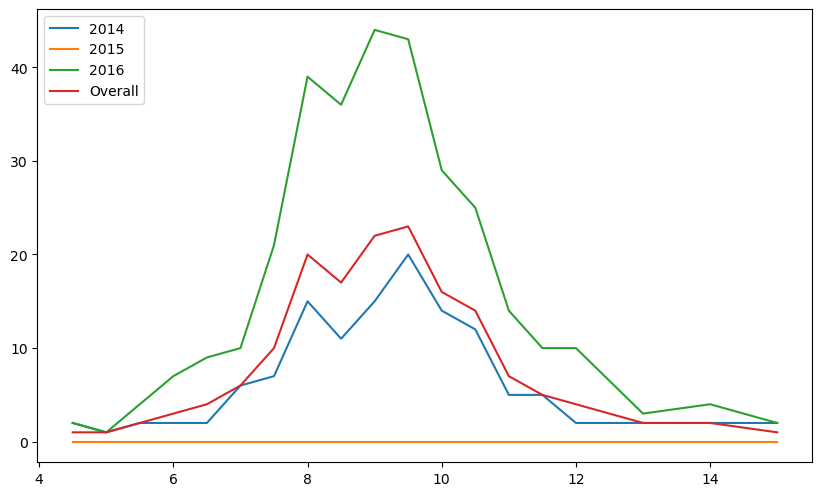

In [58]:
# United States
visualize(df_US)

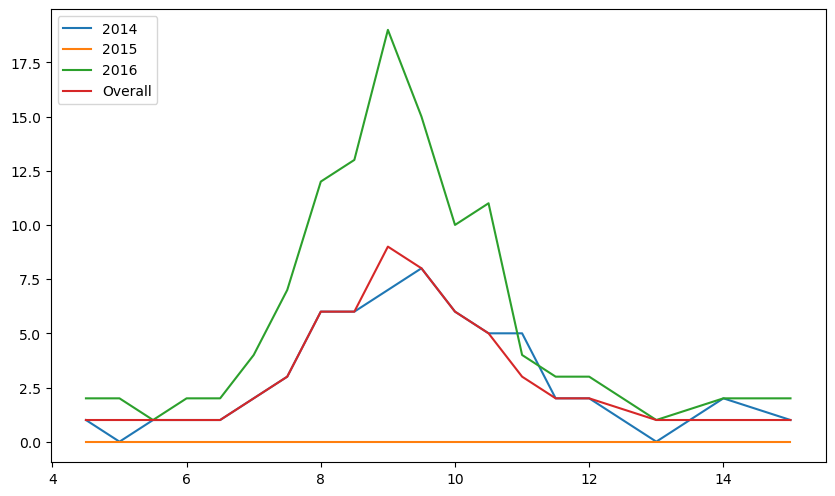

In [59]:
# United Kingdom
visualize(df_UK)

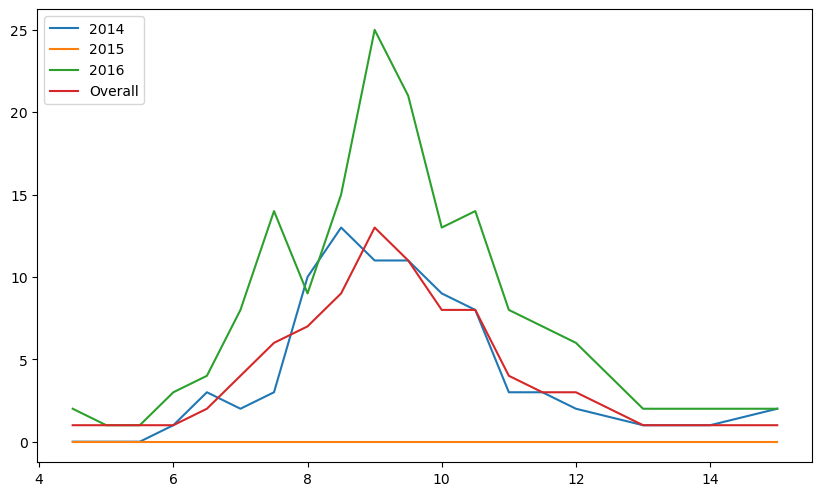

In [60]:
# Canada
visualize(df_CANADA)

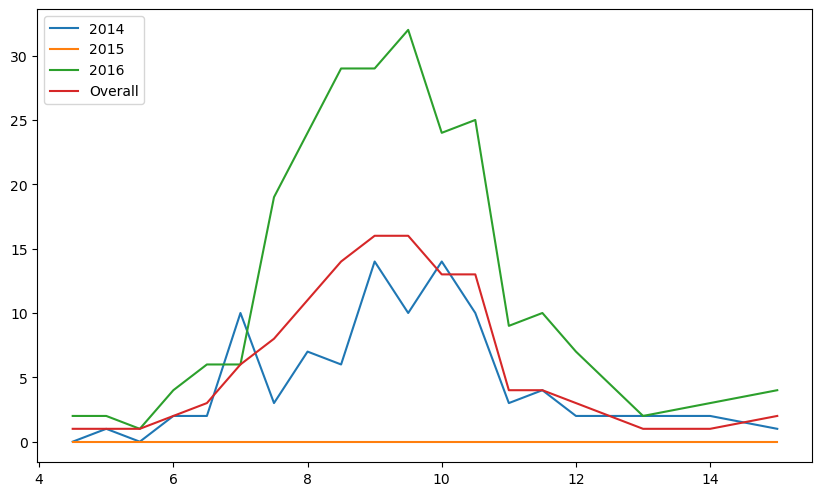

In [61]:
# Germany
visualize(df_GERMANY)

### Conclusion 

From the above graphs we can clearly visualise that the sales have increased by folds in the year 2016. So we should consider the confidence interval for 2016 itself, which is #_pairs_2016 for each and every dataset. And somehow there is an irregularity in the data, for the year 2015 there are no sales, maybe the stores were closed or the data has not been provided.